In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

  - PredCatch Analytics' Australian banking client's profitability and reputation are being hit by         fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible             completely eliminating such fraudulent transactions. PredCatch believes it can do the same by         building a predictive model to catch such fraudulent transactions in real time and decline them.       Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive       model in the first step. If successful, in the 2nd step you will have to present your solutions       and explain how it works to the client. The data has been made available to you. 
  
  
  - The challenging part of the problem is that the data contains very few fraud instances in             comparison to the overall population. To give more edge to the solution they have also collected       data regarding location '[geo_scores]' of the transactions, their own proprietary index               '[Lambda_wts]', on network turn around times '[Qset_tats]' and vulnerability qualification 
    score '[instance_scores]'. As of now you don't need to understand what they mean.
    
    
  - Training data contains masked variables pertaining to each transaction id . Your prediction target     here is 'Target' .
  
  
  - 1: Fraudulent transactions
  - 0: Clean transactions
  - this is a fictional data because the bank will not provide the official information

# goal:-

  - remove imbalanceness from given dataset
  - find the fraudulent transactions and also detect outliers
  - model building and Selection
  - model comparision through visualization
  - Anomaly detection and local outlier factor methods for the fraud

# read the imbalance datasets

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv("instance_scores.csv")
Lambda = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test_data = pd.read_csv("test_share.csv")
train_data = pd.read_csv('train.csv')

In [3]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [4]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [5]:
Lambda.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [6]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [7]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [8]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [9]:
geo.tail()

,id,geo_score
1424030,107880,1.03
1424031,282410,8.62
1424032,209634,-1.72
1424033,211652,-10.00
1424034,73455,5.86


In [10]:
instance.tail()

,id,instance_scores
1424030,80337,0.20
1424031,216371,0.64
1424032,35358,0.77
1424033,159766,10.56
1424034,197580,0.08


In [11]:
Lambda.tail()

,Group,lambda_wt
1395,Grp892,4.24
1396,Grp1072,-7.28
1397,Grp785,-2.63
1398,Grp50,0.79
1399,Grp37,-0.16


In [12]:
qset.tail()

,id,qsets_normalized_tat
1424030,13009,NaN
1424031,147556,-7.24
1424032,143331,10.00
1424033,248231,-7.93
1424034,181700,-5.17


In [13]:
train_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.683333,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.543333,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.603333,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.750000,0.520000,0.756667,...,0.640000,0.646667,0.636667,0.683333,0.843333,0.580000,0.683333,0.676667,-235.0000,0


In [14]:
test_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.700000,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.643333,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.536667,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.643333,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.543333,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500


In [15]:
# checking length of all each dataset.
print('geo',geo.shape)
print('instance',instance.shape)
print('Lambda',Lambda.shape)
print('qset',qset.shape)
print('train_data',train_data.shape)
print('test_data',test_data.shape)

geo (1424035, 2)
instance (1424035, 2)
Lambda (1400, 2)
qset (1424035, 2)
train_data (227845, 28)
test_data (56962, 27)


In [16]:
# checking columns of all each dataset.
print('geo',geo.columns)
print()
print('instance',instance.columns)
print()
print('Lambda',Lambda.columns)
print()
print('qset',qset.columns)
print()
print('train_data',train_data.columns)
print()
print('test_data',test_data.columns)

geo Index(['id', 'geo_score'], dtype='object')

instance Index(['id', 'instance_scores'], dtype='object')

Lambda Index(['Group', 'lambda_wt'], dtype='object')

qset Index(['id', 'qsets_normalized_tat'], dtype='object')

train_data Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')

test_data Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')


In [17]:
# checking summary of all each dataset.

print('geo',geo.info())
print('instance',instance.info())
print('Lambda',Lambda.info())
print('qset',qset.info())
print('train_data',train_data.info())
print('test_data',test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
geo None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
instance None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), objec

 - Here we observe that 'geo_score' and'qsets_normalized_tat' have some null values.


In [18]:
# checking no.of unique values of all each dataset.
print(geo.nunique())
print(instance.nunique())
print(Lambda.nunique())
print(qset.nunique())
print(train_data.nunique())
print(test_data.nunique())

id           284807
geo_score     25523
dtype: int64
id                 284807
instance_scores     11158
dtype: int64
Group        1400
lambda_wt    1400
dtype: int64
id                      284807
qsets_normalized_tat     24832
dtype: int64
id                227845
Group               1301
Per1                1778
Per2                2319
Per3                1469
Per4                1292
Per5                1881
Per6                1477
Per7                1901
Per8                2047
Per9                1203
Dem1                 910
Dem2                 762
Dem3                 747
Dem4                 983
Dem5                 838
Dem6                 817
Dem7                1505
Dem8                1537
Dem9                 812
Cred1               1307
Cred2                494
Cred3                636
Cred4                460
Cred5                920
Cred6                778
Normalised_FNT     29299
Target                 2
dtype: int64
id                56962
Group               9

  - the datasets('geo','instance','qset') are containing duplicated values.
  - the length of geo dataset is 1424035 rows but geo_id contain 284807 unique values and geo_score    contain 25523.
  - similary the dataset instance,qset has same unique values.
  
  - so, dataset has multiple duplicate values.

In [19]:
# creating a column (data) in train_data and test_data

train_data['data'] = 'train'
test_data['data'] = 'test'

In [20]:
train_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train


In [21]:
test_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test


In [22]:
# adding the train_data and test_data

all_data = pd.concat([train_data,test_data],axis = 0)
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [23]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [24]:
all_data.shape

(284807, 29)

In [25]:
all_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [26]:
print(all_data['id'].nunique())
print(all_data['Group'].nunique())

284807
1400


In [27]:
print(geo.isnull().sum())
print(instance.isnull().sum())
print(Lambda.isnull().sum())
print(qset.isnull().sum())
print(all_data.isnull().sum())

id               0
geo_score    71543
dtype: int64
id                 0
instance_scores    0
dtype: int64
Group        0
lambda_wt    0
dtype: int64
id                           0
qsets_normalized_tat    103201
dtype: int64
id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64


  - Here we are observing the data geo[geo_score] and qset[qsets_normalized_tat]having 7154 and 103201 
    null values.
  - firstly we fill the null values through some statistical function such as 'std','var','mean',
    'median'etc.

In [28]:
print(geo.describe())
print()
print(qset.describe())


                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


  - Here we observed the dataset geo and Qset has outliers.

In [29]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())

print(geo.isnull().sum())

qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

print(qset.isnull().sum())

id           0
geo_score    0
dtype: int64
id                      0
qsets_normalized_tat    0
dtype: int64


In [30]:
geo = geo.groupby('id').mean()

print(geo.shape)

(284807, 1)


In [31]:
instance = instance.groupby('id').mean()

print(instance.shape)

(284807, 1)


In [32]:
qset = qset.groupby('id').mean()

print(qset.shape)

(284807, 1)


In [33]:
all_data = pd.merge(all_data,geo, on = 'id', how = 'left')

all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250


In [34]:
all_data = pd.merge(all_data,instance, on = 'id', how = 'left')

all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250,0.52


In [35]:
all_data = pd.merge(all_data,qset, on = 'id', how = 'left')

all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.70
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250,0.52,0.14


In [36]:
Lambda = Lambda.groupby('Group').nunique()
Lambda.shape

(1400, 1)

In [37]:
all_data = pd.merge(all_data,Lambda, on = 'Group', how = 'left')
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.70,1
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250,0.52,0.14,1


# whole data

In [38]:
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,1
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,1
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,1
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,1
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010,1
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064,1
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020,1
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610,1


In [39]:
all_data_train = all_data[all_data['data'] == 'train']
all_data_train

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,1
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,1
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,1
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,1
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.533333,0.680000,0.693333,-246.5025,0.0,train,-0.140,-0.44,-0.546,1
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.730000,0.646667,0.656667,-249.7775,0.0,train,0.426,-0.40,0.384,1
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.696667,0.663333,0.673333,-249.7775,0.0,train,1.066,-0.13,0.010,1
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.540000,0.766667,0.710000,-242.7500,0.0,train,-3.290,-0.66,0.384,1


In [40]:
all_data_train.shape

(227845, 33)

In [41]:
all_data_test = all_data[all_data['data'] == 'test']
all_data_test

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.250,-0.04,-0.426,1
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.430,-0.77,-0.620,1
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.320,0.11,-0.406,1
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.110,0.33,0.374,1
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.110,-0.37,-0.130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010,1
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064,1
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020,1
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610,1


In [42]:
all_data_test.shape

(56962, 33)

# finding fraud transaction

In [132]:
fraud = all_data_train[all_data_train['Target'] == 1].shape[0]
normal = all_data_train[all_data_train['Target'] == 0].shape[0]

In [44]:
print(fraud)

394


In [45]:
print(normal)

227451


Text(0.5, 1.0, 'Transaction Distribution')

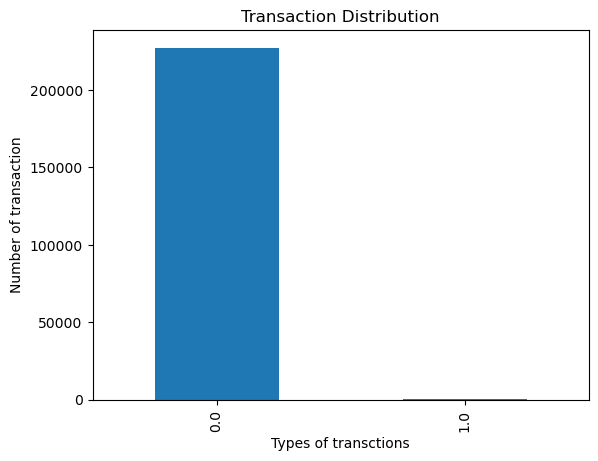

In [46]:
all_data_train['Target'].value_counts().plot(kind = 'bar')
plt.xlabel('Types of transctions')
plt.ylabel('Number of transaction')
plt.title('Transaction Distribution')

# correlation of data

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\362915371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_data_train.corr(), annot=True, cmap='coolwarm',linewidth = 0.1)


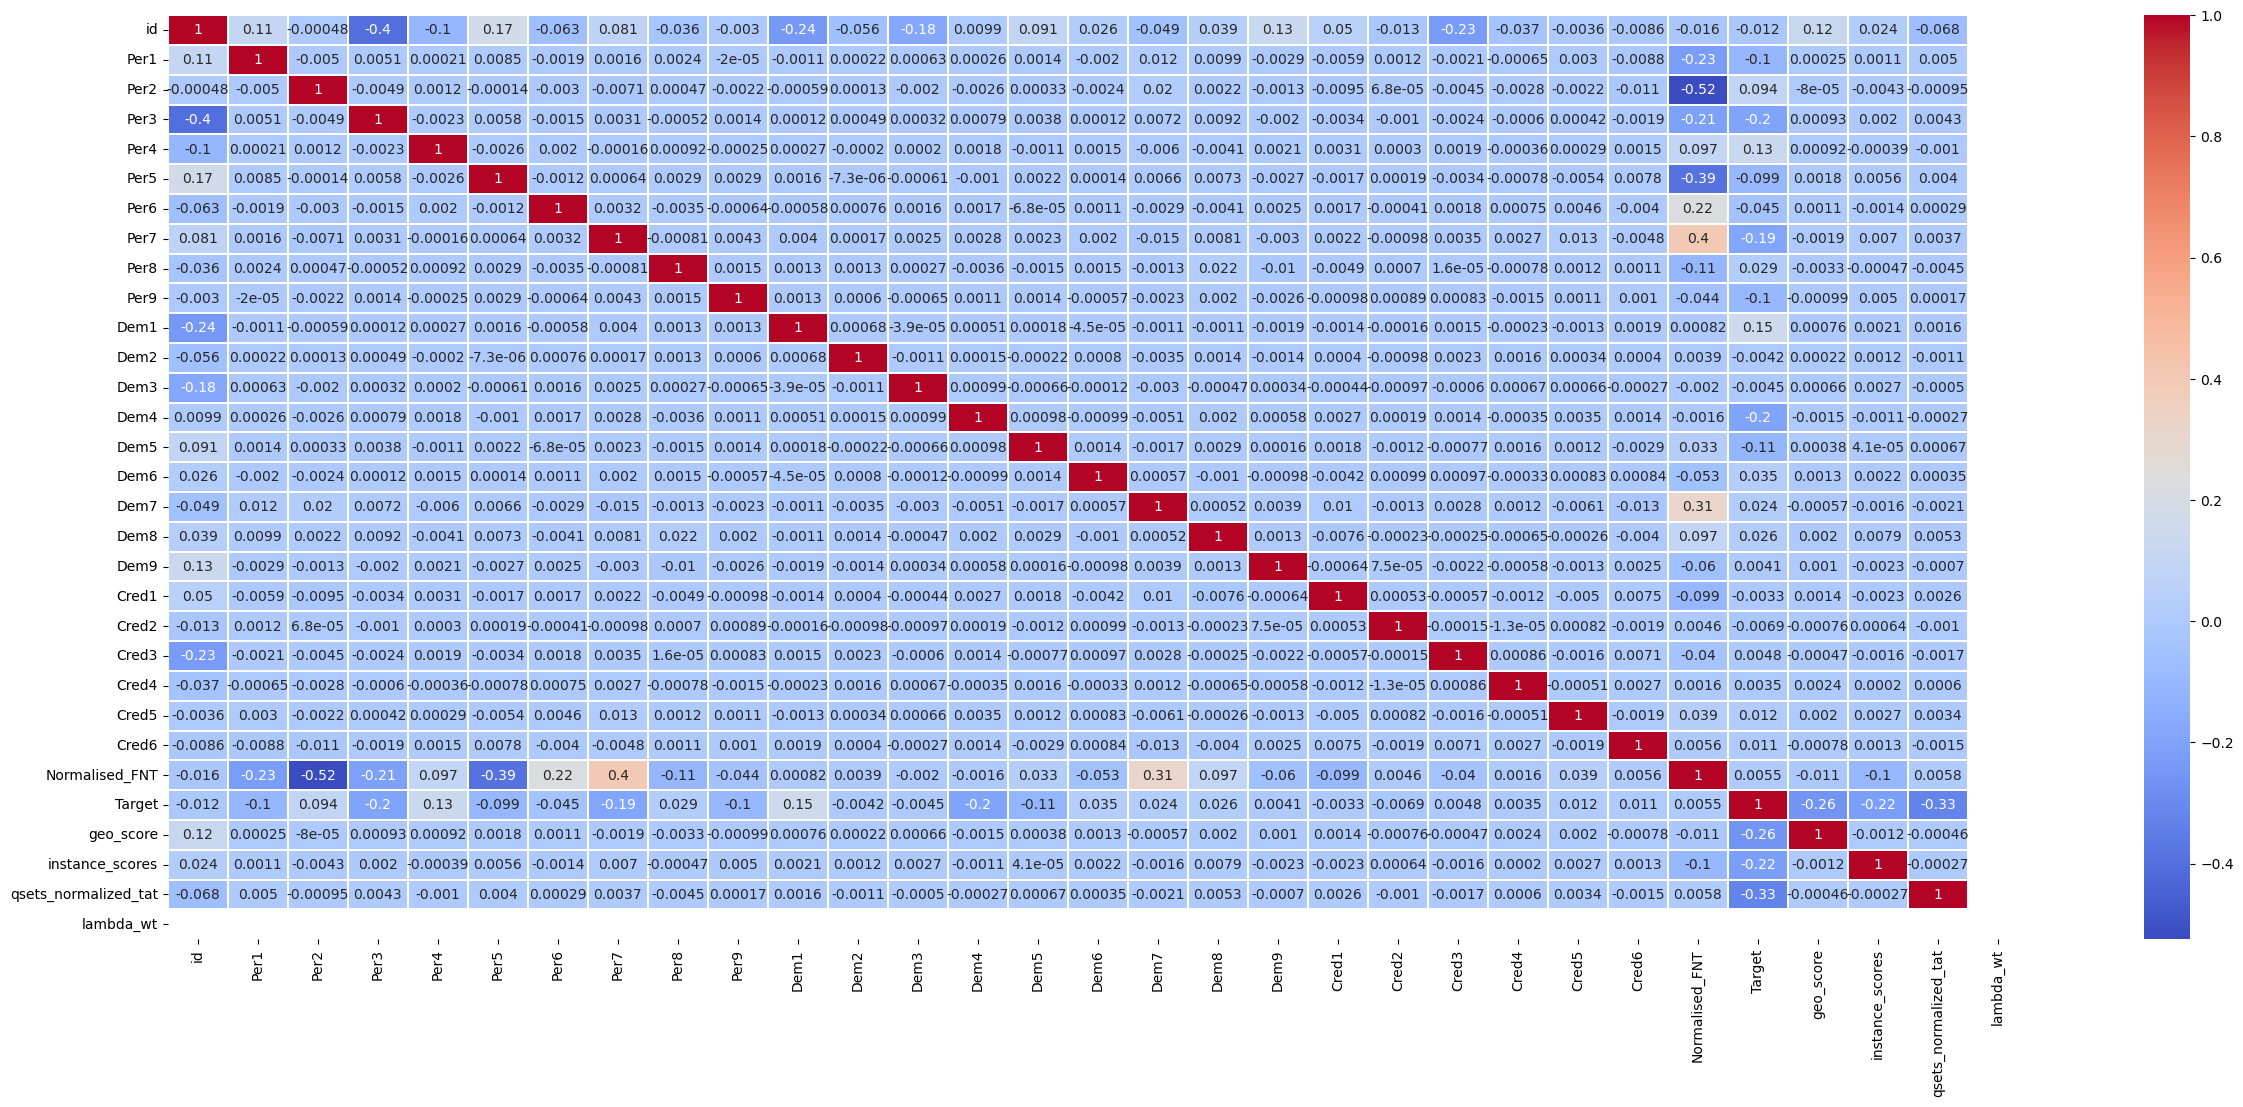

In [47]:
plt.figure(figsize=(30,12))
sns.heatmap(all_data_train.corr(), annot=True, cmap='coolwarm',linewidth = 0.1)
plt.show()

  - As expected, there is no notable correlation between features per1-cred6. There are certain correlations between some of these features and Normalised_FNT (inverse correlation with per2) and Target (direct correlation with per4 and Dem1, inverse correlation with per3 and per7)

In [127]:
# spilitting the whole dataset into independent and dependent variable
# independent data
x = all_data_train.drop(['id','Group','Target','data'],axis = 1)
x

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,1
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,1
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,1
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,1
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,0.356667,0.530000,...,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,-0.140,-0.44,-0.546,1
227841,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,0.806667,0.436667,...,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0.426,-0.40,0.384,1
227842,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,0.630000,0.870000,...,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,1.066,-0.13,0.010,1
227843,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,1.020000,0.413333,...,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,-3.290,-0.66,0.384,1


In [49]:
# dependent data

y = all_data_train['Target']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
227840    0.0
227841    0.0
227842    0.0
227843    0.0
227844    0.0
Name: Target, Length: 227845, dtype: float64

In [50]:
x.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

# Actual Data

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


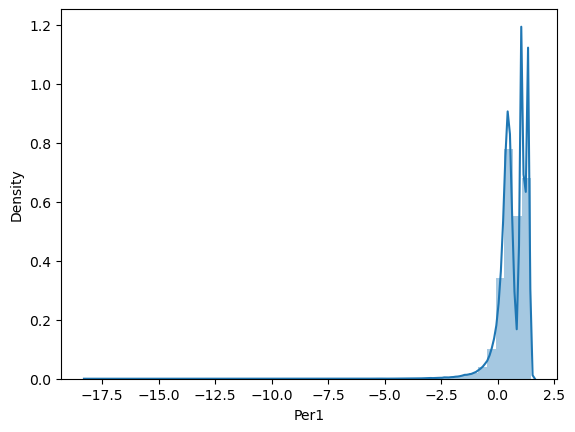

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


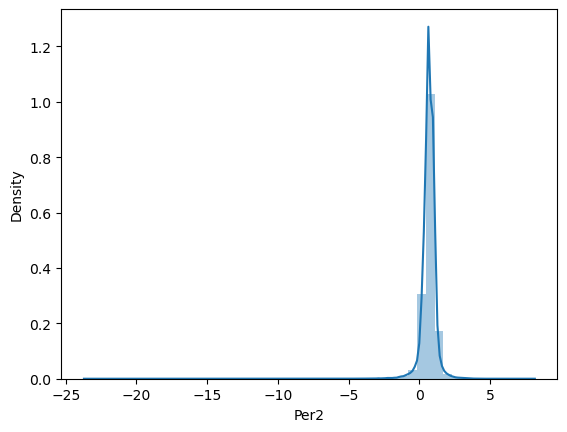

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


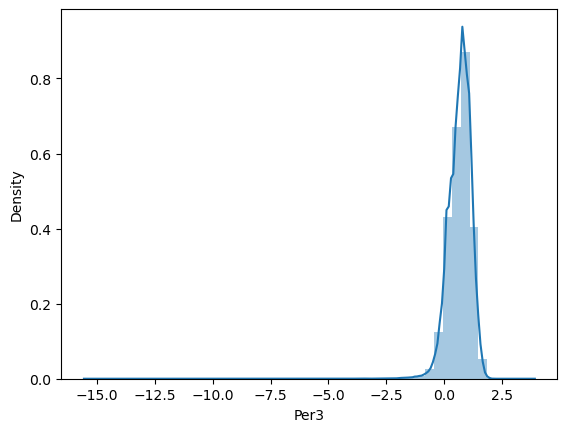

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


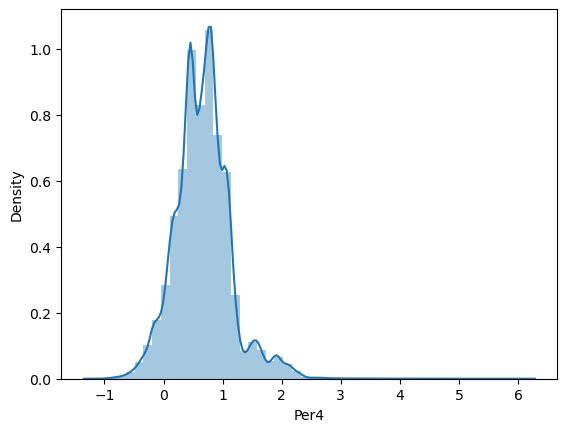

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


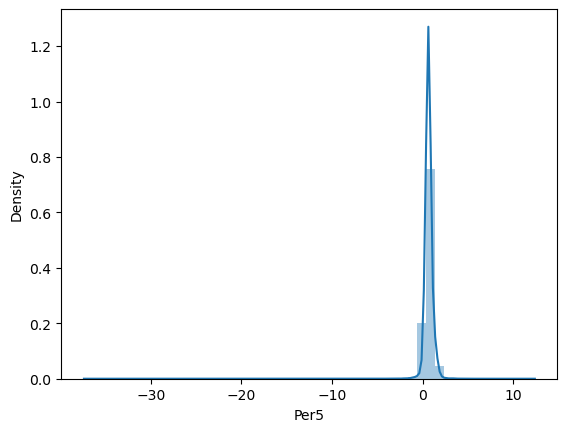

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


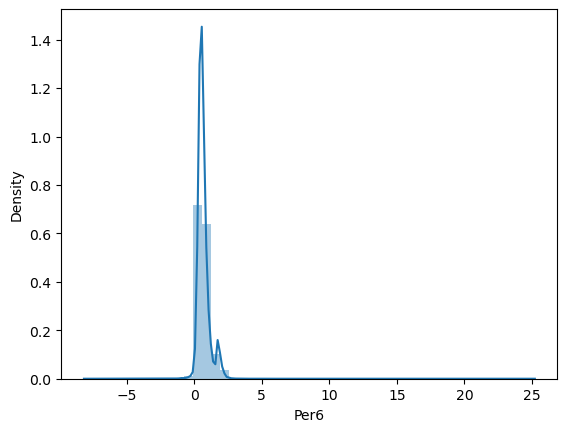

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


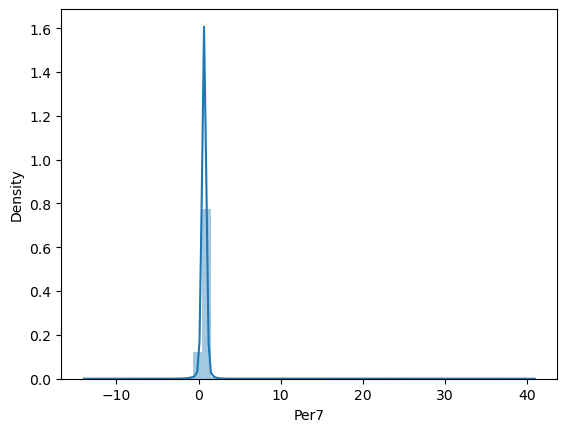

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


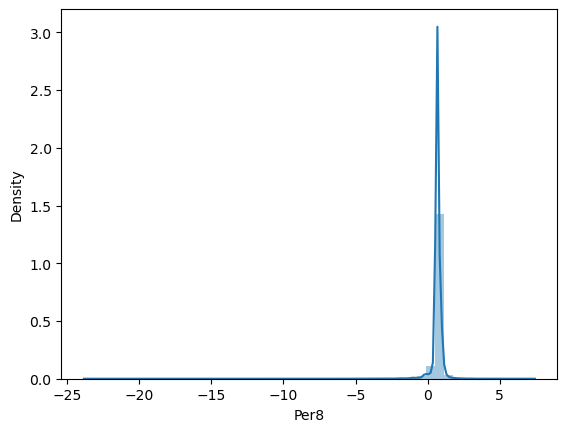

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


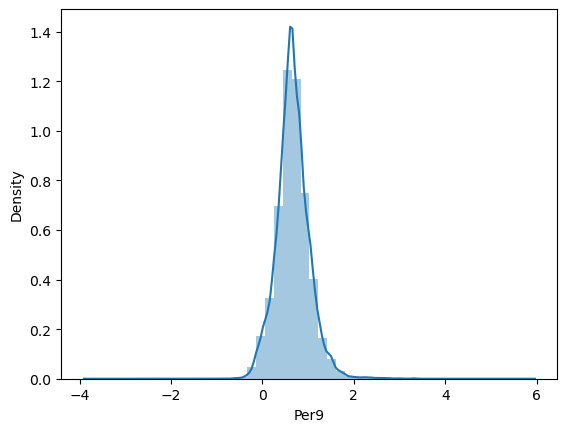

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


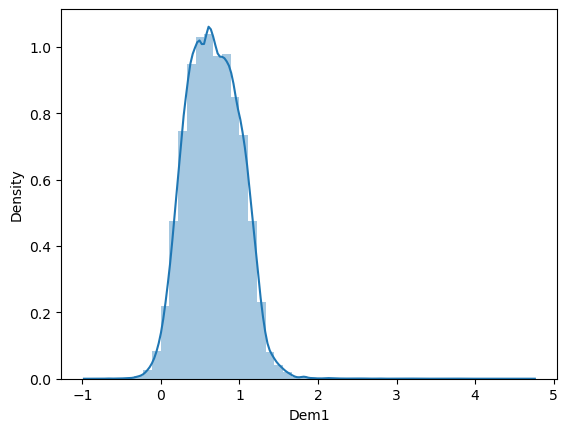

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


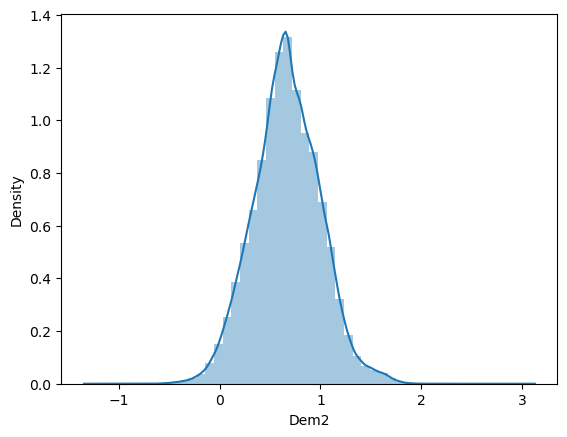

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


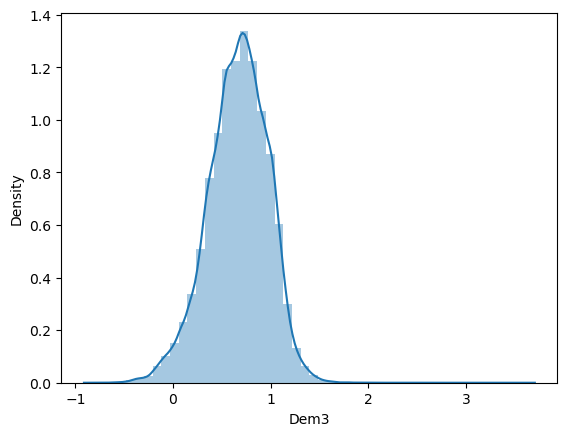

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


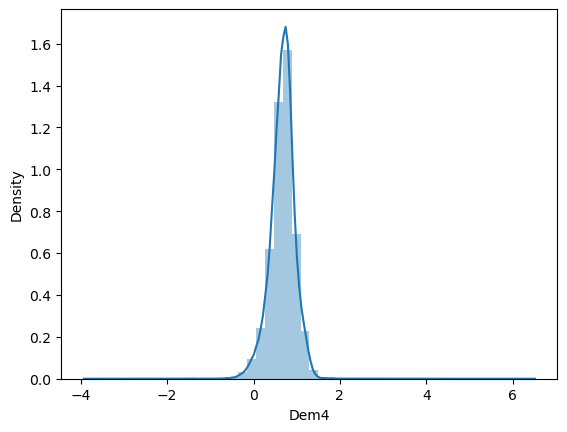

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


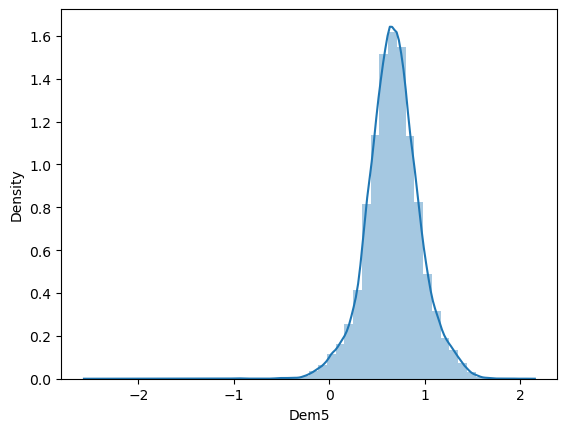

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


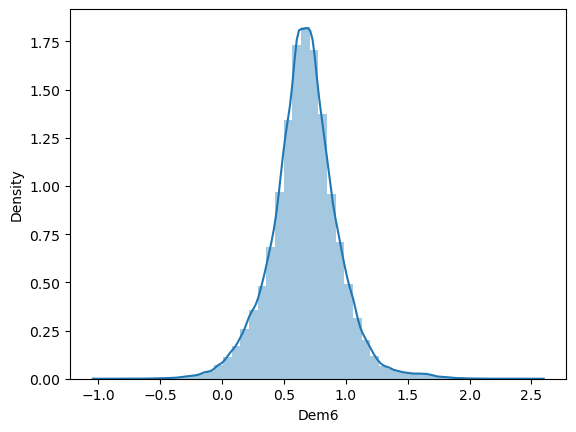

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


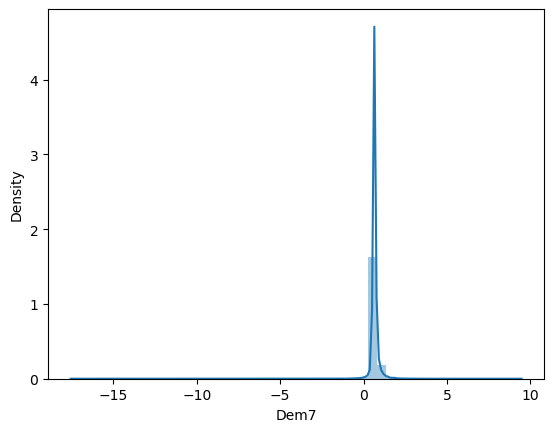

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


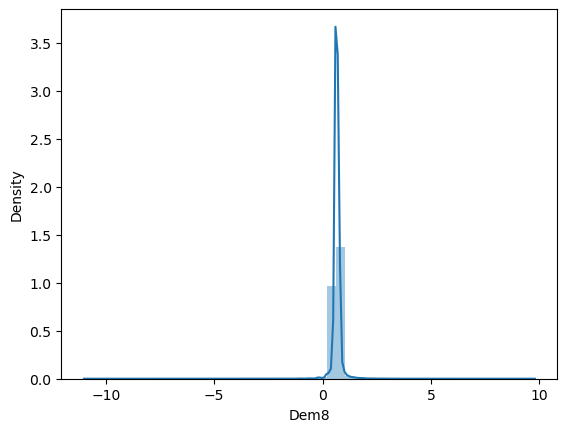

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


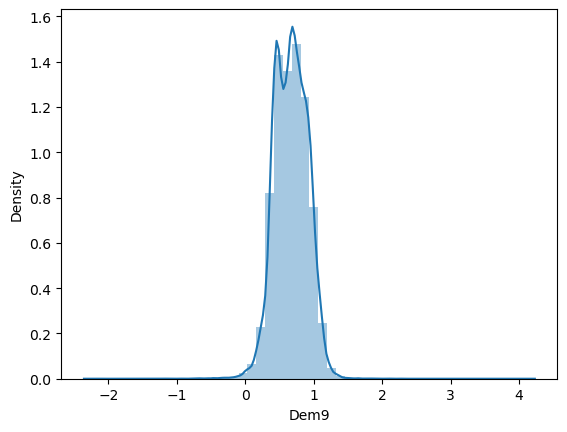

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


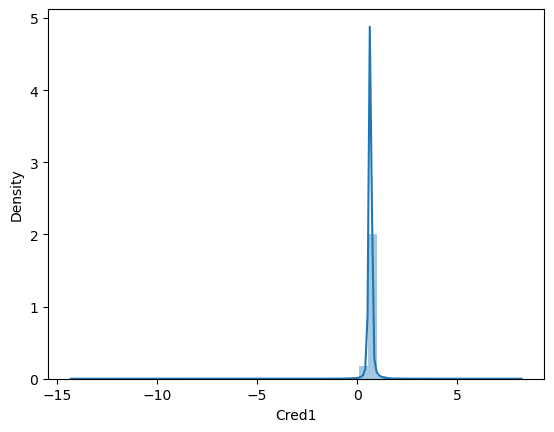

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


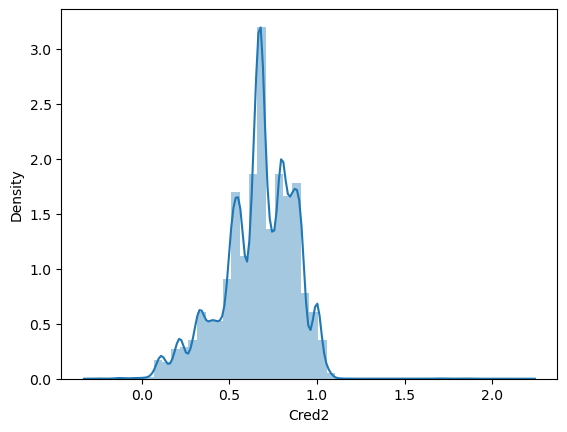

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


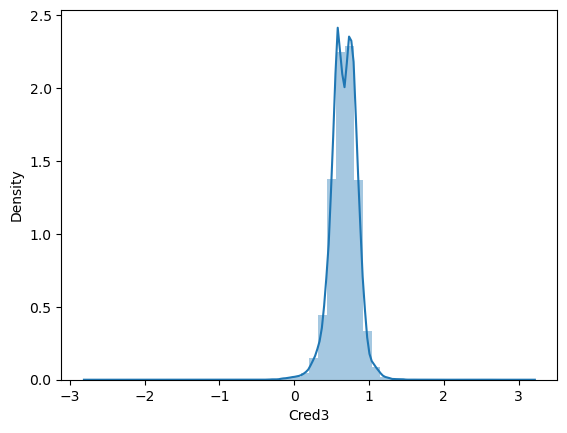

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


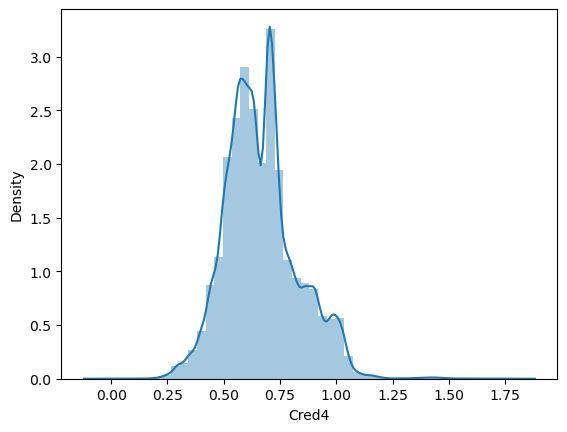

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


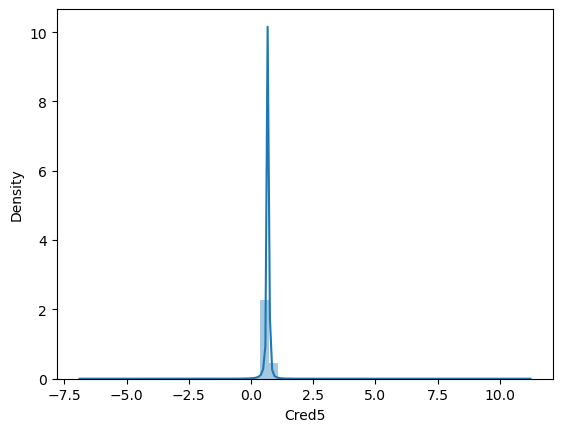

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


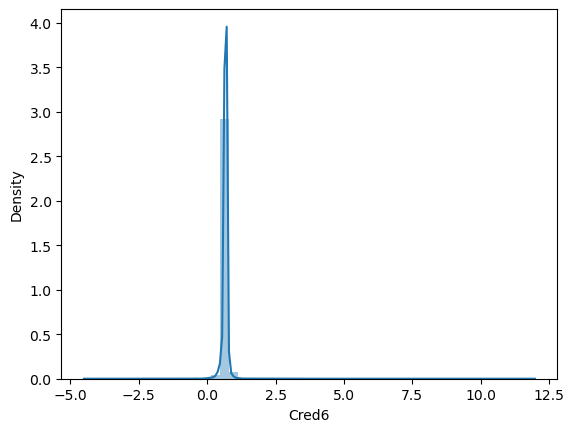

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


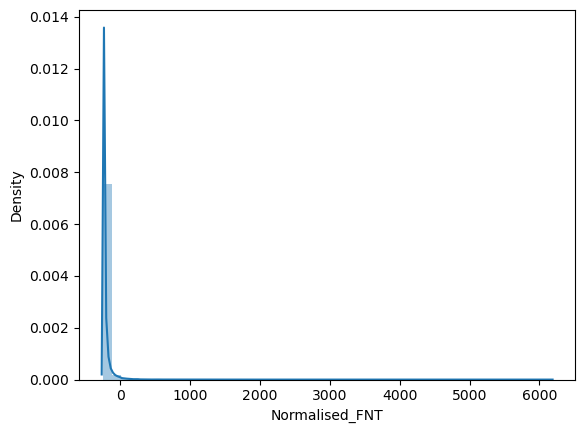

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


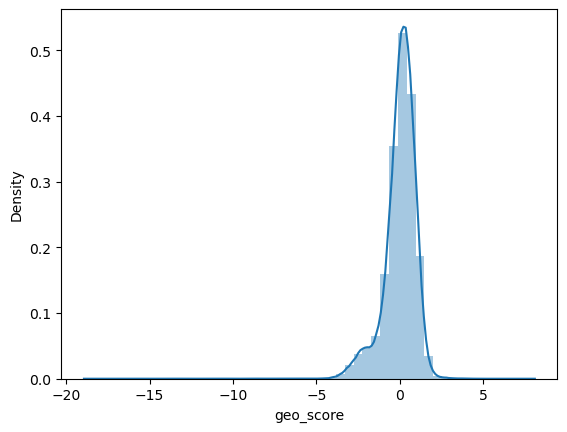

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


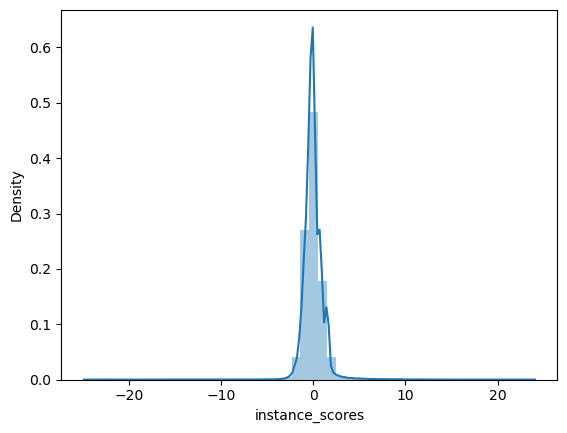

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])


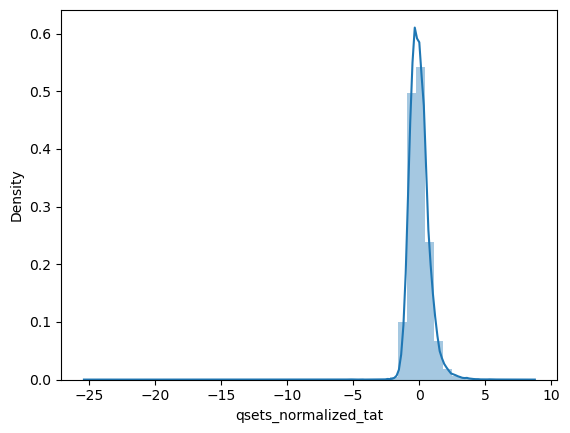

C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2775209585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


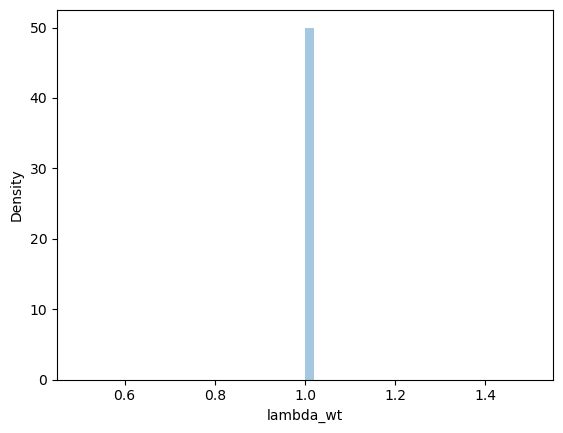

In [51]:
def distplot(col):
    sns.distplot(x[col])
    plt.show()

for i in list(x.columns)[0:]:
    distplot(i)
    

In [52]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,1
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,1
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,1
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,1
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,1


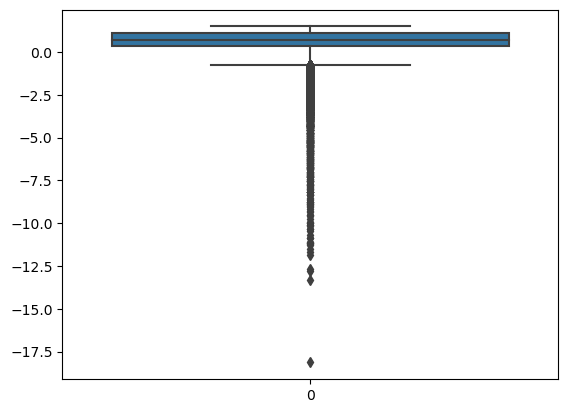

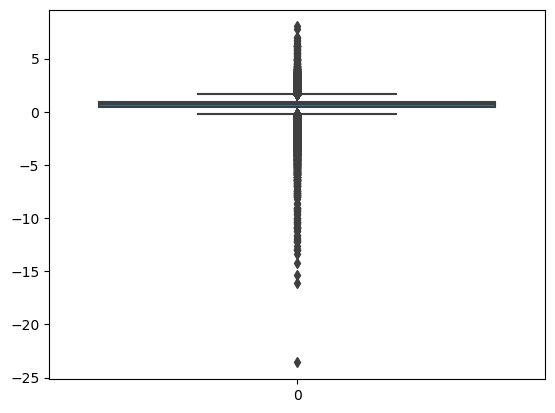

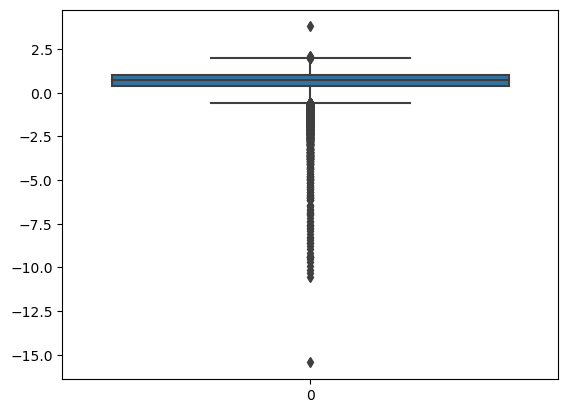

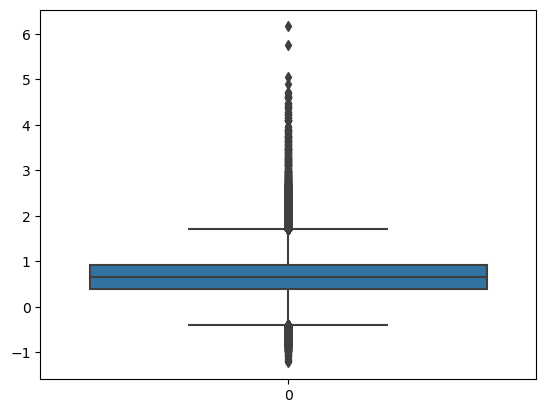

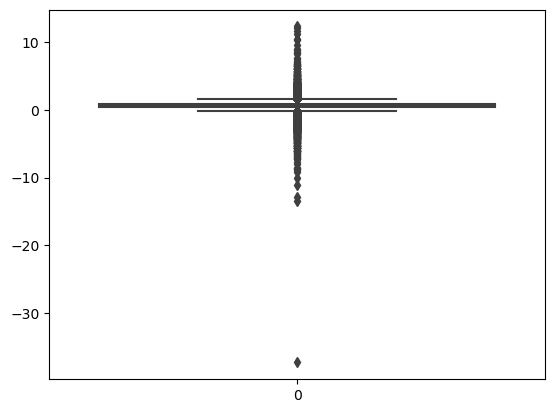

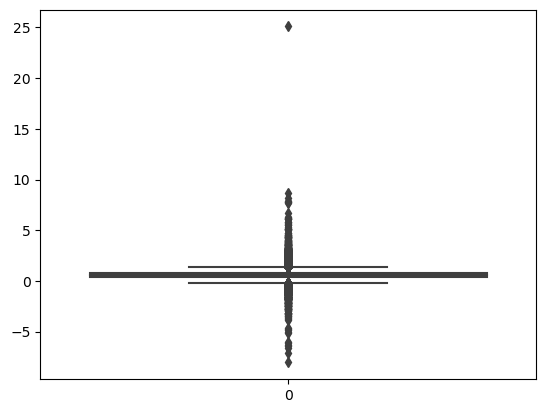

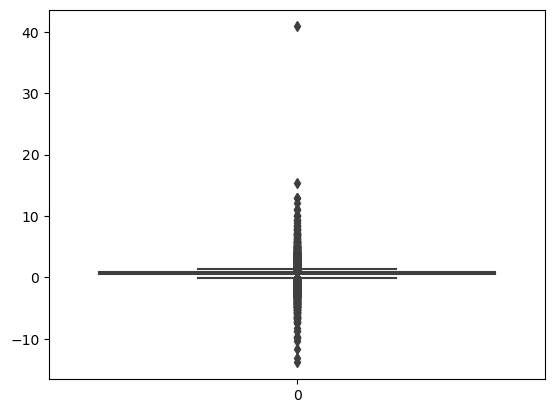

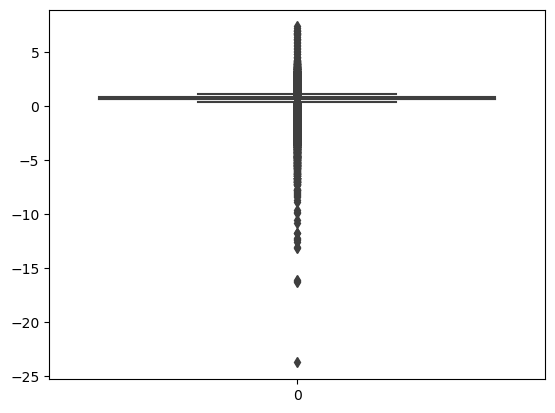

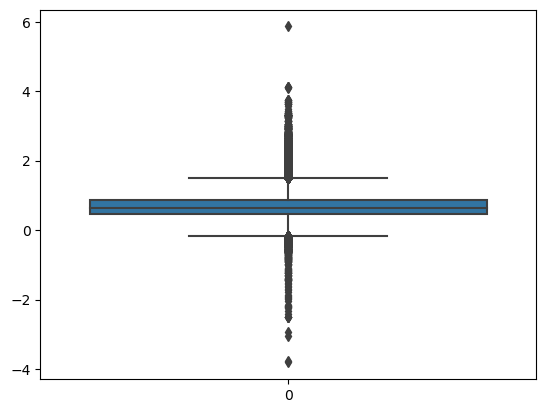

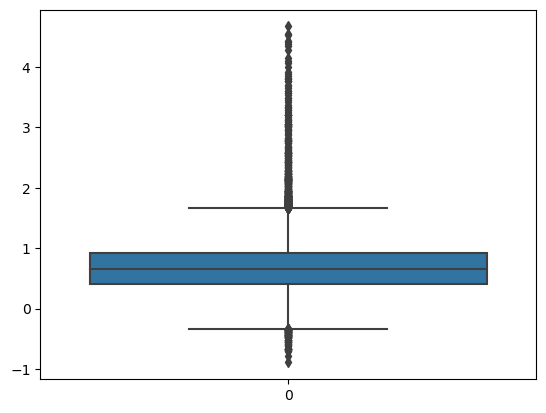

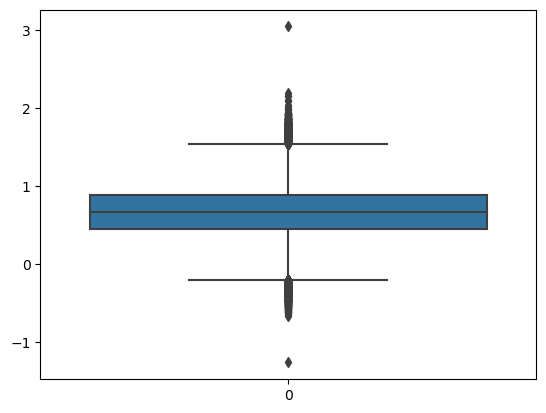

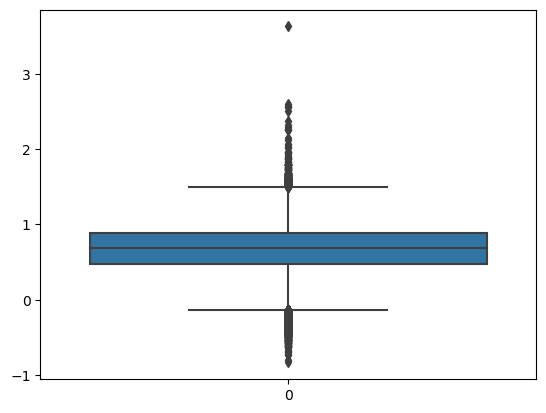

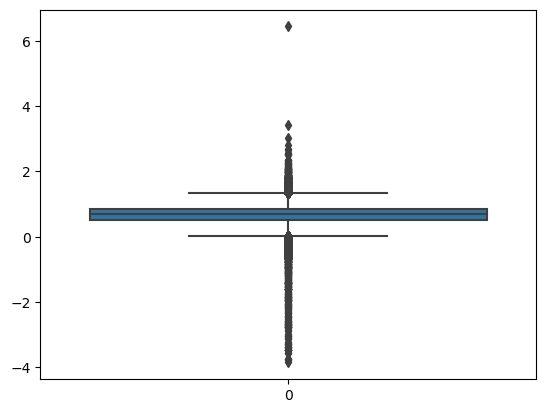

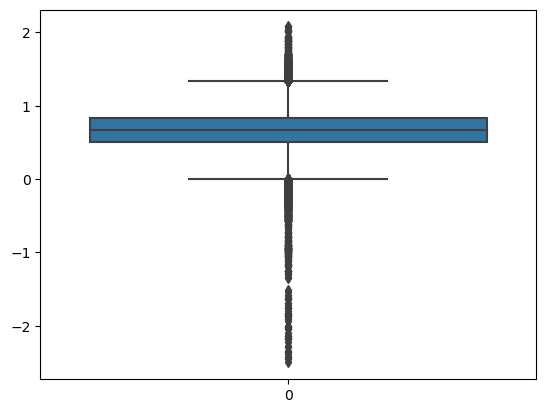

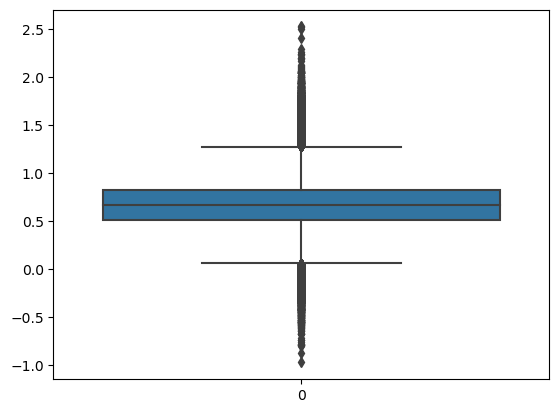

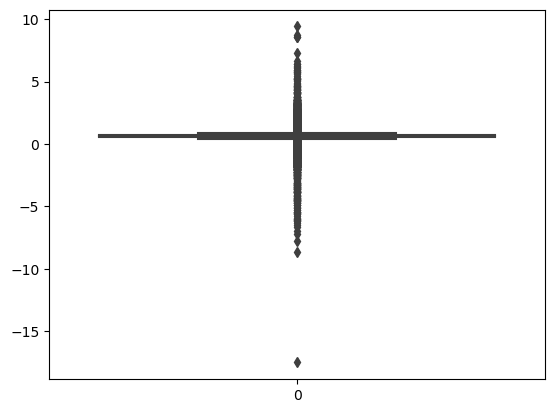

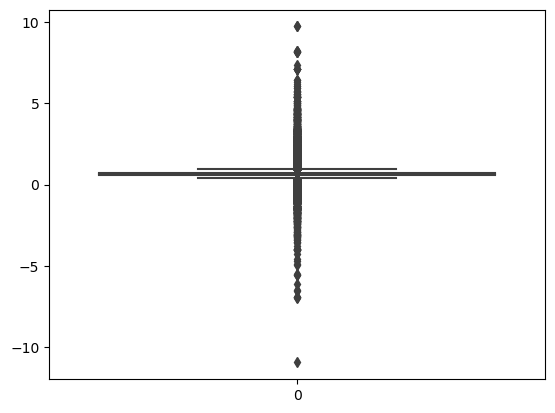

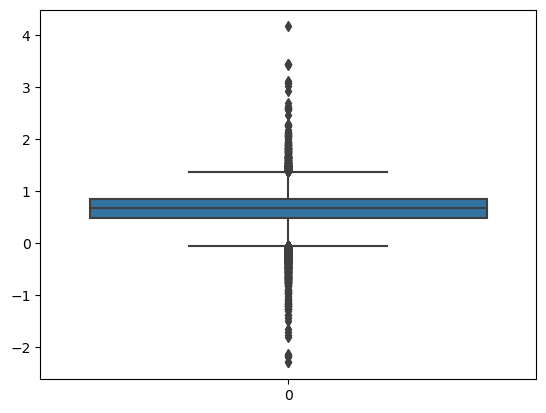

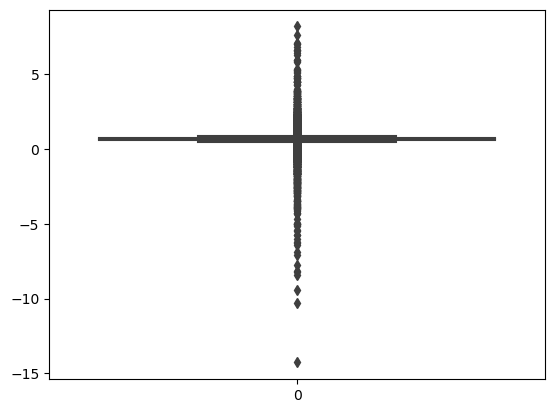

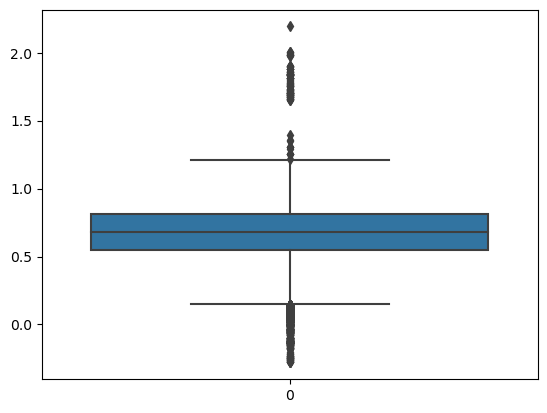

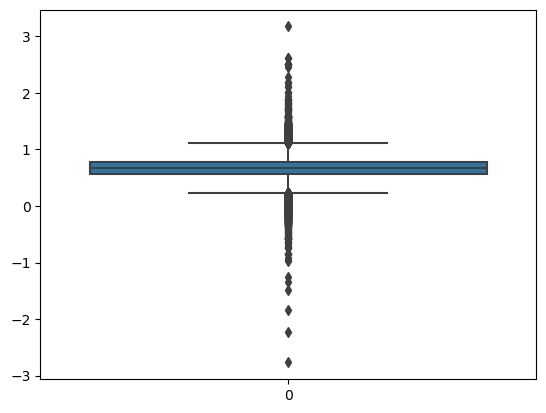

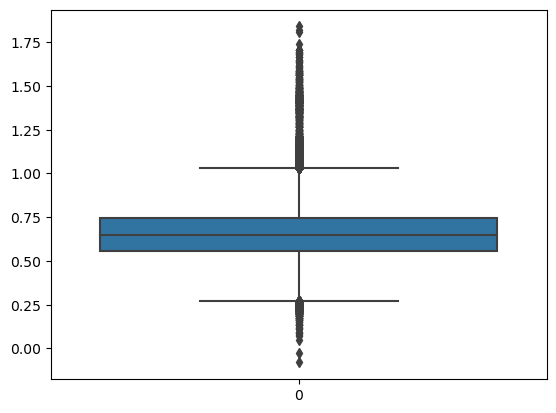

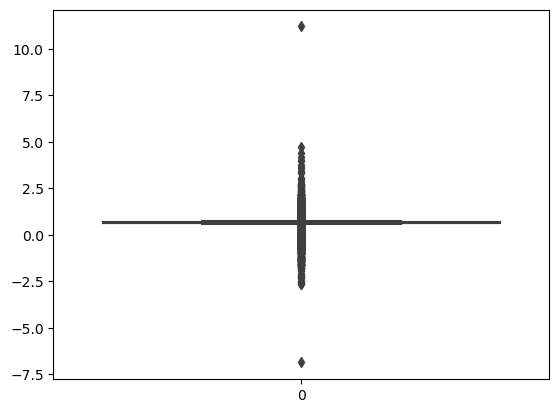

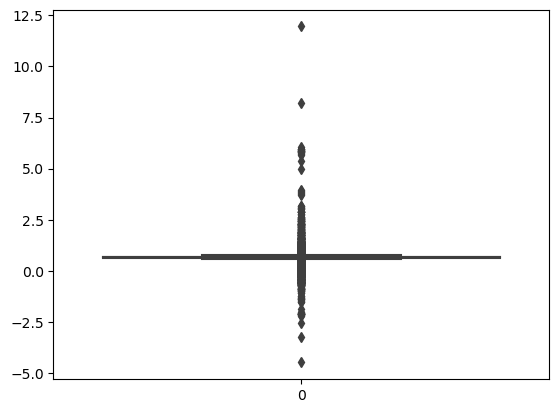

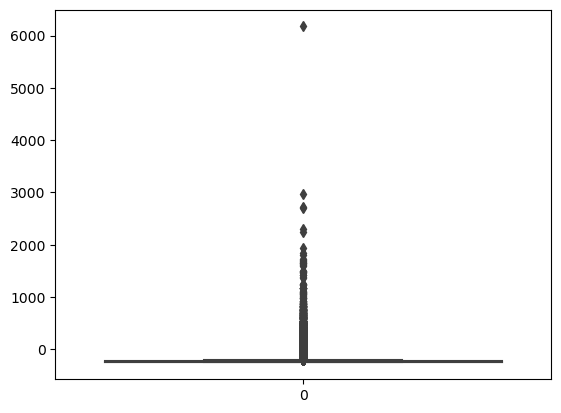

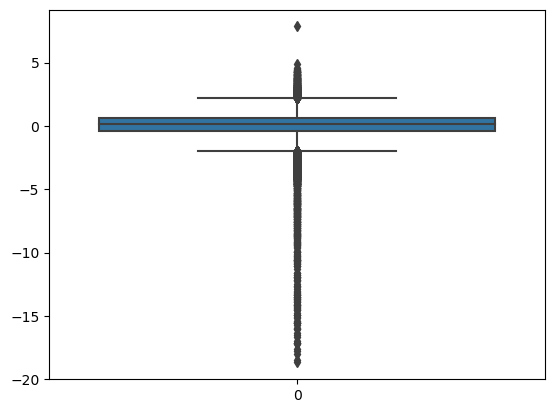

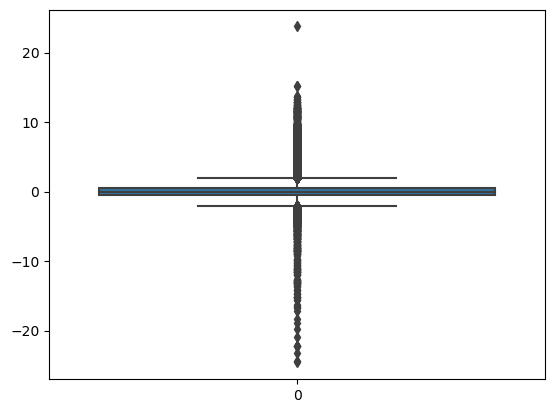

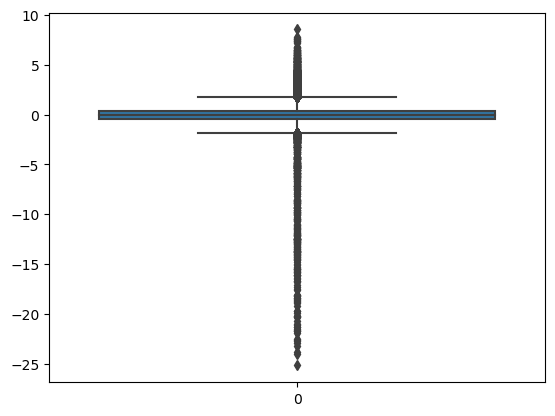

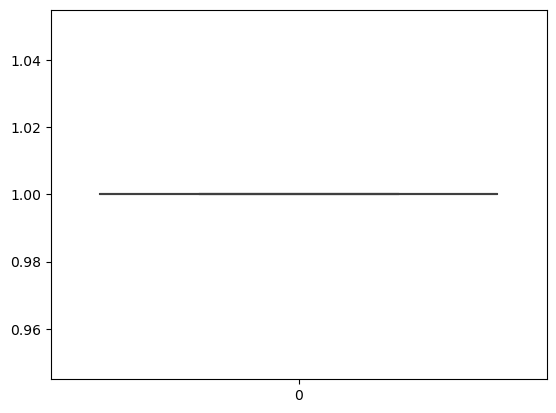

In [53]:
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [54]:
# Outlier treament

def check_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([.25, .75])
    IQR = Q3 -Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range


In [55]:
check_outlier(x['qsets_normalized_tat'])

(-1.8000000000000007, 1.7200000000000006)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2,stratify = y)

In [57]:
x_train.shape

(182276, 29)

In [58]:
x_test.shape


(45569, 29)

# Predictive Model building

# logistic Regression

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [98]:
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()

# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[181937     24]
 [   118    197]]

[[45484     6]
 [   35    44]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.89      0.63      0.74       315

    accuracy                           1.00    182276
   macro avg       0.95      0.81      0.87    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.88      0.56      0.68        79

    accuracy                           1.00     45569
   macro avg       0.94      0.78      0.84     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9992209616186443

Test Accuracy 0.999100265531392


# Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dt = dtree.fit(x_train, y_train)
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print()
print(confusion_matrix(y_test, y_pred_test_dt))
print()
# classification_report
print(classification_report(y_train, y_pred_train_dt))
print()
print(classification_report(y_test, y_pred_test_dt))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_dt))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_dt))

[[181961      0]
 [     0    315]]

[[45468    22]
 [   29    50]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.69      0.63      0.66        79

    accuracy                           1.00     45569
   macro avg       0.85      0.82      0.83     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9988808181000242


# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_train_rf = rforest.predict(x_train)
y_pred_test_rf = rforest.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))
print()
# classification_report
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_rf))

[[181961      0]
 [     0    315]]

[[45486     4]
 [   21    58]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.94      0.73      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.87      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9994513814215804


# support vector machine

In [64]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(x_train, y_train)
y_pred_train_svm = SVClass.predict(x_train)
y_pred_test_svm = SVClass.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print()
print(confusion_matrix(y_test, y_pred_test_svm))
print()
# classification_report
print(classification_report(y_train, y_pred_train_svm))
print()
print(classification_report(y_test, y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_svm))

[[181943     18]
 [   225     90]]

[[45485     5]
 [   55    24]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.83      0.29      0.43       315

    accuracy                           1.00    182276
   macro avg       0.92      0.64      0.71    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.83      0.30      0.44        79

    accuracy                           1.00     45569
   macro avg       0.91      0.65      0.72     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9986668568544406

Test Accuracy 0.9986833154117931


# BernoulliNB Algorithm

In [65]:
from sklearn.naive_bayes import BernoulliNB
bernb = BernoulliNB()
bnb = bernb.fit(x_train, y_train)
y_pred_train_bnb = bernb.predict(x_train)
y_pred_test_bnb = bernb.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bnb))
print()
print(confusion_matrix(y_test, y_pred_test_bnb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_bnb))
print()
print(classification_report(y_test, y_pred_test_bnb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bnb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_bnb))

[[181356    605]
 [   108    207]]

[[45337   153]
 [   27    52]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.25      0.66      0.37       315

    accuracy                           1.00    182276
   macro avg       0.63      0.83      0.68    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.25      0.66      0.37        79

    accuracy                           1.00     45569
   macro avg       0.63      0.83      0.68     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9960883495358687

Test Accuracy 0.9960499462353793


# voting algorithm


In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
voting = VotingClassifier(estimators=[('logit', lr ),('dtree', dt),('rforest', rf),
                                     ("svm", svm),("bnb",bnb)])
voting_evc = voting.fit(x_train, y_train)
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print()
print(confusion_matrix(y_test, y_pred_test_voting))
print()
# classification_report
print(classification_report(y_train, y_pred_train_voting))
print()
print(classification_report(y_test, y_pred_test_voting))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_voting))

C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[181948     13]
 [    86    229]]

[[45483     7]
 [   28    51]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.95      0.73      0.82       315

    accuracy                           1.00    182276
   macro avg       0.97      0.86      0.91    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.88      0.65      0.74        79

    accuracy                           1.00     45569
   macro avg       0.94      0.82      0.87     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9994568676073646

Test Accuracy 0.9992319339902126


# Accuray Score of all algorithms

In [68]:
accuracy_logit = accuracy_score(y_test, y_pred_test)
print(accuracy_logit)

accuracy_dtree = accuracy_score(y_test, y_pred_test_dt)
print(accuracy_dtree)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(accuracy_rf)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print(accuracy_svm)
accuracy_bnb = accuracy_score(y_test, y_pred_test_bnb)
print(accuracy_bnb)
accuracy_voting = accuracy_score(y_test, y_pred_test_voting)
print(accuracy_voting)

0.999100265531392
0.9988808181000242
0.9994513814215804
0.9986833154117931
0.9960499462353793
0.9992319339902126


In [69]:
point1 = ["Logistic", 'Dtree','RForest','SVM','BNB','Voting']
point2 = [accuracy_logit,accuracy_dtree,accuracy_rf,accuracy_svm,accuracy_bnb,accuracy_voting]

final_output = pd.DataFrame({"Algorithm Used": point1, "Accuracy":point2})
print(final_output)

  Algorithm Used  Accuracy
0       Logistic  0.999100
1          Dtree  0.998881
2        RForest  0.999451
3            SVM  0.998683
4            BNB  0.996050
5         Voting  0.999232


Axes(0.125,0.11;0.775x0.77)


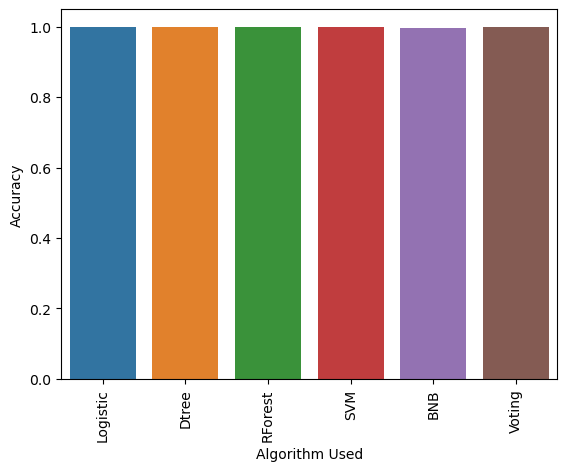

In [70]:
chart = sns.barplot(x="Algorithm Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


C:\Users\NADIR\AppData\Local\Temp\ipykernel_18712\2200256482.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


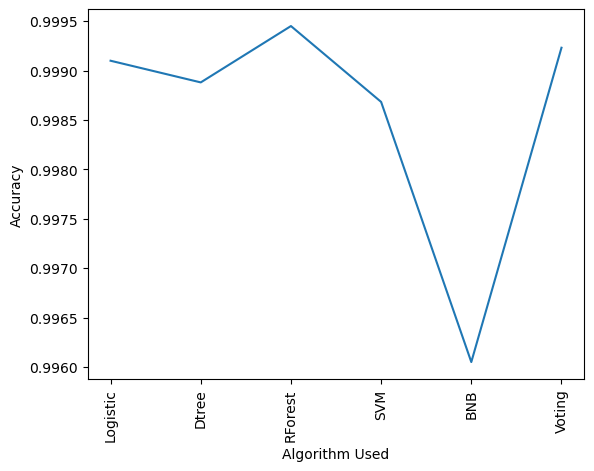

In [73]:
chart = sns.lineplot(x="Algorithm Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [75]:
estimators = [('dt', DecisionTreeClassifier()),
             ('rf', RandomForestClassifier()),
             ('svm', SVC()),
             ('nbt',BernoulliNB() )]

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                               cv=3)

In [78]:
classifier.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()), ('svm', SVC()),
                               ('nbt', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [99]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [100]:
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181943     18]
 [    63    252]]

[[45482     8]
 [   24    55]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.93      0.80      0.86       315

    accuracy                           1.00    182276
   macro avg       0.97      0.90      0.93    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.87      0.70      0.77        79

    accuracy                           1.00     45569
   macro avg       0.94      0.85      0.89     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9995556189514802

Test Accuracy 0.999297768219623


In [114]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [115]:
outlier_fraction = 394 / (394+227451)
outlier_fraction

0.001729245759178389

In [101]:
from sklearn.ensemble import IsolationForest

In [116]:
isolation = IsolationForest(contamination=outlier_fraction)
isolation.fit(x_train, y_train)

IsolationForest(contamination=0.001729245759178389)

In [117]:
anomaly_pred_train = isolation.predict(x_train)
anomaly_pred_test = isolation.predict(x_test)

In [118]:
pd.DataFrame(anomaly_pred_test).value_counts()

 1    45487
-1       82
dtype: int64

In [119]:
# Confusion Matrix
print(confusion_matrix(y_train, anomaly_pred_train))
print()
print(confusion_matrix(y_test, anomaly_pred_test))
print()
# classification_report
print(classification_report(y_train, anomaly_pred_train))
print()
print(classification_report(y_test, anomaly_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, anomaly_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, anomaly_pred_test))

[[     0      0      0]
 [   248      0 181713]
 [    68      0    247]]

[[    0     0     0]
 [   62     0 45428]
 [   20     0    59]]

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.78      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.26      0.00    182276
weighted avg       0.00      0.00      0.00    182276


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.75      0.00        79

    accuracy                           0.00     45569
   macro avg       0.00      0.25      0.00     45569
weighted avg       0.00      0.00      0.00     45569


Train Accuracy 0.001355087888696263

Test Accuracy 0.0012947398450701135


C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NADIR\anaconda3\Lib\site-packages\sklea

In [120]:
for i, x in enumerate(x_test):
    if anomaly_pred_test[i] == 1:
        print(f"Anomaly Detected:{x}")
    else:
        print(f"Normal Transaction:{x}")

Anomaly Detected:Per1
Anomaly Detected:Per2
Anomaly Detected:Per3
Anomaly Detected:Per4
Anomaly Detected:Per5
Anomaly Detected:Per6
Anomaly Detected:Per7
Anomaly Detected:Per8
Anomaly Detected:Per9
Anomaly Detected:Dem1
Anomaly Detected:Dem2
Anomaly Detected:Dem3
Anomaly Detected:Dem4
Anomaly Detected:Dem5
Anomaly Detected:Dem6
Anomaly Detected:Dem7
Anomaly Detected:Dem8
Anomaly Detected:Dem9
Anomaly Detected:Cred1
Anomaly Detected:Cred2
Anomaly Detected:Cred3
Anomaly Detected:Cred4
Anomaly Detected:Cred5
Anomaly Detected:Cred6
Anomaly Detected:Normalised_FNT
Anomaly Detected:geo_score
Anomaly Detected:instance_scores
Anomaly Detected:qsets_normalized_tat
Anomaly Detected:lambda_wt


In [121]:
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.svm import OneClassSVM

In [122]:
OneClassSVM()

OneClassSVM()

In [129]:
len(x)


227845

In [130]:
final_classification_model = {"IsolationForest": IsolationForest(n_estimators=100,contamination=outlier_fraction, max_samples=len(x)),
                                                                "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction),
                                                                "OneClassSVM" : OneClassSVM()}

In [135]:
fraud

394

In [ ]:
total_outlier_found = fraud

for i , (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name =="LocalOutlierFactor" :
        y_pred = clf.fit_predict(x_test)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM":
        clf.fit(x_train)
        y_pred = clf.predict(x_test)
    
    else:
        clf.fit(x_train)
        score_prediction = clf.decision_function(x_train)
        y_pred = clf.predict(x_test)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y_test).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y_test, y_pred))

C:\Users\NADIR\anaconda3\Lib\site-packages\sklearn\ensemble\_iforest.py:302: UserWarning: max_samples (227845) is greater than the total number of samples (182276). max_samples will be set to n_samples for estimation.
  warn(


IsolationForest : 113
Accuracy Score :
0.9975202440255437
LocalOutlierFactor : 120
Accuracy Score :
0.9973666308235862


# Observation

  - Isolation Forest detected 113 errors versus Local Outlier Factor detecting 120 errors vs. SVM.           detecting 8516 errors
  - Isolation Forest has a 99.75% more accurate than LOF of 99.73% and SVM of 68.09.
  
  -  When comparing error precision & recall for 3 models , the Isolation Forest performed much better     than the LOF as we can see that the detection of fraud cases is around 15 % versus LOF detection       rate of just 2 % and SVM of 0%.
    
  - So overall Isolation Forest Method performed much better in determining the fraud cases which is       around 30%.
  
  - We can also improve on this accuracy by increasing the sample size or use deep learning algorithms     however at the cost of computational expense.We can also use complex anomaly detection models to       get better accuracy in determining more fraudulent cases

# References

  - from kaggle
  - from UCI machine learning